# Test different embeddrs on a dataset

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split


from load_data import load_data
from embedder import Embedder
from embedder import Model
from evaluator import Evaluator
from visualizator import Visualizator
from graph_generator import Graph_Generator

from sklearn.decomposition import TruncatedSVD
from eden import graph
import umap

from sklearn.neighbors import KNeighborsClassifier

### Create embedders to test

In [2]:
#### model 1
eden = graph.Vectorizer(complexity = 1)  # Vectorize with complexity 1
model1 = Model(eden, has_fit = False)
pca = TruncatedSVD()
model2 = Model(pca)                      # PCA 
emb_1 = Embedder([model1,model2],name="Vect_1 PCA")


##### model 2
eden = graph.Vectorizer(complexity = 5) # Vectorize with complexity 1
model1 = Model(eden, has_fit = False)
pca = TruncatedSVD()
model2 = Model(pca)                     # PCA 
emb_2 = Embedder([model1,model2],name="Vect_5 PCA")


emb = [emb_1,emb_2]

### Tun tests repeating 5 times on the following dimensions = [2,4,8,16,32,64]

In [5]:
datasets_names = ["MUTAG","PROTEINS","AIDS"] ### Vectorize su DD è moolto lento

times = 4
dim = np.logspace(1, 6, num=6, base=2).astype(int)

results = try_datasets(datasets_names,times,dim,emb)


dataset:  MUTAG
	 iteration n: 1
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 2
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 3
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 4
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
dataset:  PROTEINS
	 iteration n: 1
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 2
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 3
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 4
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
dataset:  AIDS
	 iteration n: 1
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 2
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 3
	 	 dim:  2
	

Dimensions:  [ 2  4  8 16 32 64]

*****************************
Method:  Vect_1 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.687  0.697  0.701  0.725  0.73   0.742
Precision  0.773  0.814  0.81   0.82   0.802  0.812
Recall     0.799  0.768  0.772  0.803  0.836  0.855
F1         0.771  0.777  0.779  0.799  0.809  0.824
*****************************
Method:  Vect_5 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.689  0.715  0.698  0.717  0.742  0.708
Precision  0.802  0.809  0.804  0.811  0.813  0.794
Recall     0.77   0.809  0.772  0.785  0.823  0.799
F1         0.77   0.794  0.774  0.788  0.806  0.782
Dims:  [ 2  4  8 16 32 64]
Model:  Vect_1 PCA
Model:  Vect_5 PCA


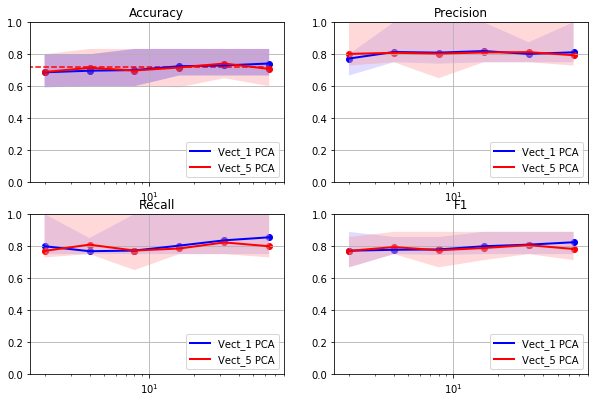

In [7]:
results["MUTAG"].summarize()
results["MUTAG"].plot(model=[0,1])

Dimensions:  [ 2  4  8 16 32 64]

*****************************
Method:  Vect_1 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.616  0.637  0.676  0.637  0.642  0.636
Precision  0.682  0.707  0.731  0.706  0.703  0.694
Recall     0.68   0.683  0.733  0.683  0.7    0.708
F1         0.677  0.692  0.729  0.692  0.699  0.699
*****************************
Method:  Vect_5 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.66   0.682  0.676  0.676  0.682  0.671
Precision  0.719  0.736  0.732  0.731  0.738  0.723
Recall     0.717  0.734  0.729  0.733  0.728  0.738
F1         0.715  0.733  0.727  0.73   0.732  0.728
Dims:  [ 2  4  8 16 32 64]
Model:  Vect_1 PCA
Model:  Vect_5 PCA


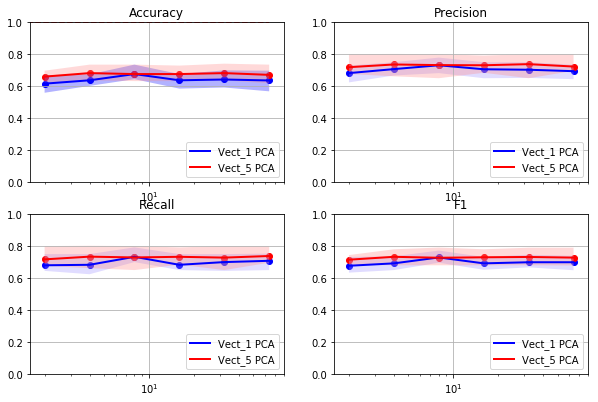

In [8]:
results["PROTEINS"].summarize()
results["PROTEINS"].plot(model=[0,1])

Dimensions:  [ 2  4  8 16 32 64]

*****************************
Method:  Vect_1 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.833  0.856  0.897  0.918  0.933  0.936
Precision  0.898  0.911  0.944  0.958  0.964  0.968
Recall     0.896  0.909  0.928  0.94   0.953  0.952
F1         0.896  0.91   0.935  0.948  0.958  0.96
*****************************
Method:  Vect_5 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.906  0.922  0.956  0.961  0.963  0.965
Precision  0.941  0.95   0.969  0.975  0.976  0.974
Recall     0.943  0.953  0.977  0.978  0.978  0.982
F1         0.941  0.951  0.973  0.976  0.977  0.978
Dims:  [ 2  4  8 16 32 64]
Model:  Vect_1 PCA
Model:  Vect_5 PCA


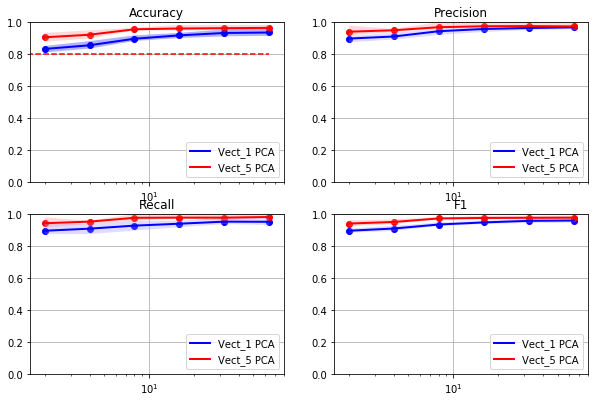

In [9]:
results["AIDS"].summarize()
results["AIDS"].plot(model=[0,1])

# Artificial Data

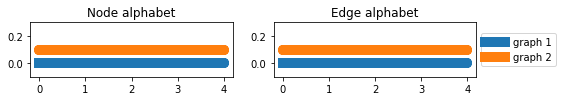

In [7]:
n_graphs = 500
degree = 4
seed = 10
node_alph_end_g1 = 5
node_alph_end_g2 = 5
pert_times_g1 = 10
pert_times_g2 = 10
n_nodes = 25 

# instanziate class Graph_Generator
gen = Graph_Generator(n_graphs = n_graphs , degree = degree, seed = seed)

g1,node_alph_1,edge_alph_1 = gen.generate(n_nodes = n_nodes,
                                          node_alph_end = node_alph_end_g1,
                                          edge_alph_end = 5,
                                         seed=seed)

g2,node_alph_2,edge_alph_2 = gen.generate(n_nodes = n_nodes,
                                          node_alph_end = node_alph_end_g2,
                                          edge_alph_end = 5,
                                         seed=seed)


graphs,labels = gen.generate_set(g1,g2,node_alph_1,edge_alph_1,
                                 node_alph_2,edge_alph_2,
                                 pert_times_g1 = pert_times_g1,
                                 pert_times_g2 = pert_times_g2,                                 
                                 plot = True)

### 3 mbedders 

In [8]:
#### model 1
eden = graph.Vectorizer(complexity = 1)
model1 = Model(eden, has_fit = False)
pca = TruncatedSVD()
model2 = Model(pca)
emb_1 = Embedder([model1,model2],name="Vect1 PCA")


##### model 2
eden = graph.Vectorizer(complexity = 5)
model1 = Model(eden, has_fit = False)
pca = TruncatedSVD()
model2 = Model(pca)
emb_2 = Embedder([model1,model2],name="Vect5 PCA")


#### model 3
eden = graph.Vectorizer(complexity = 1)
model1 = Model(eden, has_fit = False)
pca = TruncatedSVD()
model2 = Model(pca)
uma = umap.UMAP()
model3 = Model(uma)
emb_3 = Embedder([model1,model2,model3],name="Vect1 PCA UMAP")

emb = [emb_1,emb_2,emb_3]


dim = np.logspace(1, 6, num=6, base=2).astype(int)
times = 2
vis = repeat_n_times(graphs,labels,dim,times,emb)


	 iteration n: 1
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64
	 iteration n: 2
	 	 dim:  2
	 	 dim:  4
	 	 dim:  8
	 	 dim:  16
	 	 dim:  32
	 	 dim:  64


In [9]:
vis.summarize()

Dimensions:  [ 2  4  8 16 32 64]

*****************************
Method:  Vect1 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.722  0.726  0.749  0.746  0.749  0.732
Precision  0.749  0.747  0.755  0.753  0.758  0.729
Recall     0.74   0.757  0.78   0.768  0.775  0.789
F1         0.728  0.743  0.76   0.755  0.761  0.751
*****************************
Method:  Vect5 PCA
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.734  0.748  0.717  0.74   0.743  0.738
Precision  0.772  0.762  0.724  0.747  0.763  0.753
Recall     0.72   0.764  0.741  0.762  0.756  0.751
F1         0.736  0.759  0.725  0.743  0.749  0.739
*****************************
Method:  Vect1 PCA UMAP
               2      4      8     16     32     64
---------  -----  -----  -----  -----  -----  -----
Accuracy   0.716  0.743  0.741  0.729  0.714  0.714
Precision  0.757  0.776  0.75   0.

Dims:  [ 2  4  8 16 32 64]
Model:  Vect1 PCA
Model:  Vect5 PCA


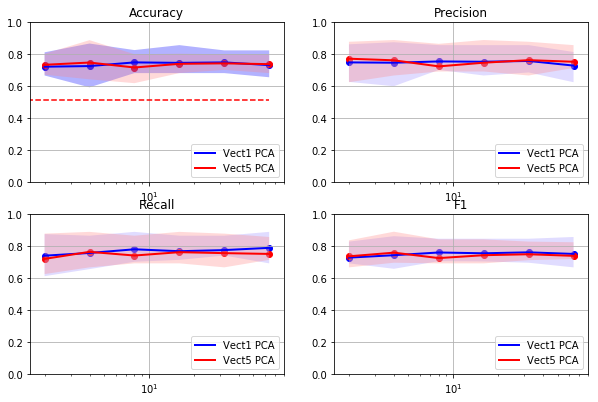

In [10]:
vis.plot(model=[0,1])

Dims:  [ 2  4  8 16 32 64]
Model:  Vect1 PCA
Model:  Vect1 PCA UMAP


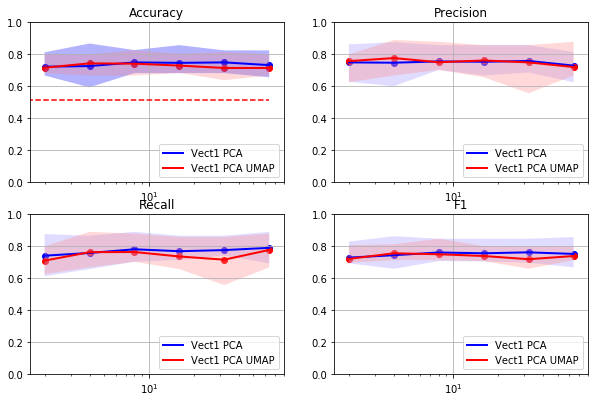

In [11]:
vis.plot(model=[0,2])

Dims:  [ 2  4  8 16 32 64]
Model:  Vect5 PCA
Model:  Vect1 PCA UMAP


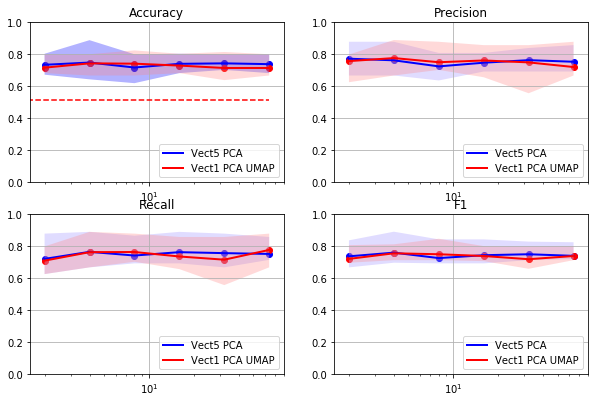

In [12]:
vis.plot(model=[1,2])

In [2]:
def try_datasets(datasets_names,times,dim,emb):
    results = {}
    for dataset in datasets_names:

        print("dataset: ",dataset)
        graphs , labels = load_data(dataset)
        vis = repeat_n_times(graphs,labels,dim,times,emb)
        results[dataset]=vis

    return results


def repeat_n_times(graphs,labels,dim,times,emb, test_size=0.3):

    n_classifiers = len(emb)
    
    names = []
    for i in emb:
        names.append(i.name)
        
    vis = Visualizator(dim, n_classifiers = n_classifiers,models_names=names)

    for t in range(0,times):
        X_train, X_test, y_train, y_test = train_test_split(graphs, labels, test_size=test_size)
        print("\t iteration n:",t+1)
        for d in range(0,len(dim)):
            print("\t \t dim: ",int(dim[d]))
            dimension_embedding = int(dim[d])


            for j in range(0,len(emb)):
                #change dimenction of the last embedder in estimators
                emb[j].estimatros[-1].estimator.n_components=dimension_embedding
                X_small = emb[j].fit(X_train,y_train).transform(X_test)

                evaluator = Evaluator(KNeighborsClassifier(n_neighbors=1))
                # compute the metrics
                acc, pre, rec, f = evaluator.performance_with_kfold(X_small,y_test)

                # add the computed performance in the visualizzator
                vis.add_metrics(acc,pre,rec,f,j,d)

    vis.y_test = y_test
    return(vis)